# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [3]:
# Create dataframe from cities
cities_df = pd.DataFrame({'City':cities})

cities_df["Cloudiness"] = np.NaN
cities_df["Country"] = np.NaN
cities_df["Date"] = np.NaN
cities_df["Humidity"] = np.NaN
cities_df["Lat"] = np.NaN
cities_df["Lng"] = np.NaN
cities_df["Max Temp"] = np.NaN
cities_df["Wind Speed"] = np.NaN
#cities_df = cities_df.head(20)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create settings dictionary with information we're interested in
#settings = {"units": "metric", "appid": api_key}
url = "http://api.openweathermap.org/data/2.5/"
weather = "weather?"
# Imperial uses Fahrenheit, miles/hour; Time of data calculation, unix, UTC 
units = "units=Imperial"
record_number = 1
    
print("Beginning Data Retrieval")
print("------------------------------")
# Loop through the cities_test_df

for index, row in cities_df.iterrows():
    city = row['City']

    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    # make request
    response = requests.get(url + weather + units + "&APPID=" + api_key + "&q=" + city)

    print(f"Processing Record {record_number} of Set 1 | {city}")
    # print the responses
    print(response.url)
    record_number += 1
     
    # convert to json
    response = response.json()

    #cities_copy_df = cities_df.copy()
    
    try:
    #if response['cod'] == 200:
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
    except KeyError:
        cities_df.loc[index, 'City'] = np.NaN
        print(f"{city} returned no results. Skipping...")
    pass

print("------------------------------")
print("Done")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=chuy
Processing Record 2 of Set 1 | mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=mehamn
Processing Record 3 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=rikitea
Processing Record 4 of Set 1 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=port%20elizabeth
Processing Record 5 of Set 1 | rodrigues alves
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=rodrigues%20alves
Processing Record 6 of Set 1 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=castro
Processing Record 7 

Processing Record 52 of Set 1 | makakilo city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=makakilo%20city
Processing Record 53 of Set 1 | pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=pisco
Processing Record 54 of Set 1 | pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=pevek
Processing Record 55 of Set 1 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=lebu
Processing Record 56 of Set 1 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=georgetown
Processing Record 57 of Set 1 | san andres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=san%20andres
Processing Record 58 of Set 1 | puerto ayora
http://api.openweathermap.org/data/

Processing Record 104 of Set 1 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=hilo
Processing Record 105 of Set 1 | tabiauea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=tabiauea
tabiauea returned no results. Skipping...
Processing Record 106 of Set 1 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=katsuura
Processing Record 107 of Set 1 | phan thiet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=phan%20thiet
Processing Record 108 of Set 1 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=upernavik
Processing Record 109 of Set 1 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=yellowknife
Processing Record 110 of Set

Processing Record 156 of Set 1 | albacete
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=albacete
Processing Record 157 of Set 1 | cairns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=cairns
Processing Record 158 of Set 1 | nigde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=nigde
Processing Record 159 of Set 1 | chumphon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=chumphon
Processing Record 160 of Set 1 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=palabuhanratu
palabuhanratu returned no results. Skipping...
Processing Record 161 of Set 1 | astoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=astoria
Processing Record 162 of Set 1 

Processing Record 208 of Set 1 | carnduff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=carnduff
Processing Record 209 of Set 1 | aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=aklavik
Processing Record 210 of Set 1 | grand river south east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=grand%20river%20south%20east
grand river south east returned no results. Skipping...
Processing Record 211 of Set 1 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=kahului
Processing Record 212 of Set 1 | thasos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=thasos
Processing Record 213 of Set 1 | waitati
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=wait

Processing Record 258 of Set 1 | west plains
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=west%20plains
Processing Record 259 of Set 1 | surt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=surt
Processing Record 260 of Set 1 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=saldanha
Processing Record 261 of Set 1 | tsienyane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=tsienyane
tsienyane returned no results. Skipping...
Processing Record 262 of Set 1 | faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=faya
Processing Record 263 of Set 1 | upington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=upington
Processing Record 264 of Set 1 | nerchi

Processing Record 311 of Set 1 | rosario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=rosario
Processing Record 312 of Set 1 | paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=paamiut
Processing Record 313 of Set 1 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=qaqortoq
Processing Record 314 of Set 1 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=saleaula
saleaula returned no results. Skipping...
Processing Record 315 of Set 1 | vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=vestmanna
Processing Record 316 of Set 1 | riberalta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=riberalta
Processing Record 317 of Set 1 | h

Processing Record 362 of Set 1 | tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=tumannyy
tumannyy returned no results. Skipping...
Processing Record 363 of Set 1 | barranca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=barranca
Processing Record 364 of Set 1 | yuzhno-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=yuzhno-yeniseyskiy
yuzhno-yeniseyskiy returned no results. Skipping...
Processing Record 365 of Set 1 | vrangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=vrangel
Processing Record 366 of Set 1 | asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=asau
asau returned no results. Skipping...
Processing Record 367 of Set 1 | ilulissat
http://api.openweathermap.org/data/2.5/weathe

Processing Record 414 of Set 1 | vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=vanimo
Processing Record 415 of Set 1 | moche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=moche
Processing Record 416 of Set 1 | mahanje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=mahanje
mahanje returned no results. Skipping...
Processing Record 417 of Set 1 | bambanglipuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=bambanglipuro
Processing Record 418 of Set 1 | darlowo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=darlowo
Processing Record 419 of Set 1 | north bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=north%20bend
Processing Record 420 of Set 1 | 

Processing Record 465 of Set 1 | brownfield
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=brownfield
Processing Record 466 of Set 1 | eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=eureka
Processing Record 467 of Set 1 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=mount%20gambier
Processing Record 468 of Set 1 | rovaniemi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=rovaniemi
Processing Record 469 of Set 1 | at-bashi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=at-bashi
Processing Record 470 of Set 1 | camana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=camana
camana returned no results. Skipping...
Processing Record 471 of S

Processing Record 516 of Set 1 | kitgum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=kitgum
Processing Record 517 of Set 1 | creel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=creel
Processing Record 518 of Set 1 | remanso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=remanso
Processing Record 519 of Set 1 | altay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=altay
Processing Record 520 of Set 1 | moyale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=moyale
Processing Record 521 of Set 1 | tezu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=tezu
Processing Record 522 of Set 1 | pavagada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing Record 569 of Set 1 | burnie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=burnie
Processing Record 570 of Set 1 | naugarzan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=naugarzan
naugarzan returned no results. Skipping...
Processing Record 571 of Set 1 | bitung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=bitung
Processing Record 572 of Set 1 | marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=marcona
marcona returned no results. Skipping...
Processing Record 573 of Set 1 | kabardinka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=kabardinka
Processing Record 574 of Set 1 | bjala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0068c6246427ca2a223d80fdd407cbcd&q=bjala
bj

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Output File (CSV)
cities_df.to_csv("output_data/cities.csv")

In [6]:
#Use .count() to see if there's missing information
cities_df.count()

City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Lat           531
Lng           531
Max Temp      531
Wind Speed    531
dtype: int64

In [ ]:
# Use infer_objects to set data type
#cities_df = cities_df.infer_objects()
# Drop empty rows
#clean_df = cities_df.dropna()
#clean_df.head(50)

In [7]:
cities_df.dtypes

City           object
Cloudiness    float64
Country        object
Date          float64
Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [8]:
#clean_df = cities_df.infer_objects()
#clean_df.dtypes
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,chuy,0.0,UY,1.537473e+09,78.0,-33.69,-53.46,61.32,7.61
1,mehamn,75.0,NO,1.537471e+09,87.0,71.03,27.85,51.80,10.29
2,rikitea,68.0,PF,1.537472e+09,100.0,-23.12,-134.97,72.66,13.53
3,port elizabeth,90.0,US,1.537471e+09,73.0,39.31,-74.98,75.02,9.17
4,rodrigues alves,90.0,BR,1.537470e+09,94.0,-7.74,-72.65,73.40,6.04
5,castro,92.0,CL,1.537472e+09,97.0,-42.48,-73.76,48.99,15.55
6,avarua,40.0,CK,1.537470e+09,60.0,-21.21,-159.78,71.60,14.99
7,cape town,0.0,ZA,1.537470e+09,71.0,-33.93,18.42,51.80,5.82
8,mount darwin,0.0,ZW,1.537473e+09,33.0,-16.77,31.58,74.28,9.62
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
clean_df = cities_df.dropna()
clean_df.head(50)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,chuy,0.0,UY,1.537473e+09,78.0,-33.69,-53.46,61.32,7.61
1,mehamn,75.0,NO,1.537471e+09,87.0,71.03,27.85,51.80,10.29
2,rikitea,68.0,PF,1.537472e+09,100.0,-23.12,-134.97,72.66,13.53
3,port elizabeth,90.0,US,1.537471e+09,73.0,39.31,-74.98,75.02,9.17
4,rodrigues alves,90.0,BR,1.537470e+09,94.0,-7.74,-72.65,73.40,6.04
5,castro,92.0,CL,1.537472e+09,97.0,-42.48,-73.76,48.99,15.55
6,avarua,40.0,CK,1.537470e+09,60.0,-21.21,-159.78,71.60,14.99
7,cape town,0.0,ZA,1.537470e+09,71.0,-33.93,18.42,51.80,5.82
8,mount darwin,0.0,ZW,1.537473e+09,33.0,-16.77,31.58,74.28,9.62
10,hanko,56.0,FI,1.537473e+09,86.0,59.83,22.95,61.41,18.79


In [ ]:
#cols = cities_df.columns[cities_df['Cloudiness', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed']]
#cols
#cities_df[cols] = cities_df[cols].apply(pd.to_numeric, errors='coerce', axis=0)
#cities_df.dtypes

In [10]:
# Output File (CSV)
clean_df.to_csv("output_data/clean.csv")

In [14]:
clean_df.count()

City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Lat           531
Lng           531
Max Temp      531
Wind Speed    531
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0,0.5,'Max Temperature (F)')

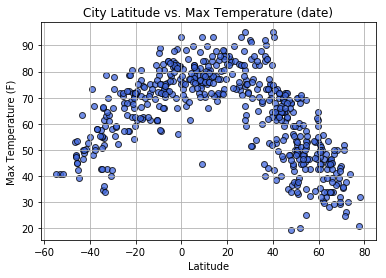

In [11]:
plt.scatter(clean_df['Lat'], clean_df['Max Temp'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties    
plt.grid(True)
#plt.ylim(21,105)
#plt.xlim(-61,85)
plt.title("City Latitude vs. Max Temperature (date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#### Latitude vs. Humidity Plot

Text(0,0.5,'Humidity (%)')

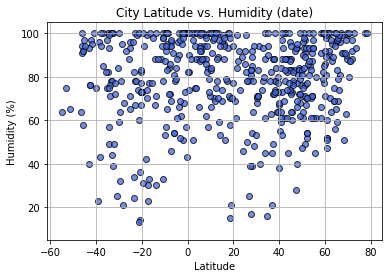

In [12]:
plt.scatter(clean_df['Lat'], clean_df['Humidity'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)
plt.grid(True)
plt.ylim(5,105)
#plt.xlim(-61,85)
plt.title("City Latitude vs. Humidity (date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#### Latitude vs. Cloudiness Plot

In [ ]:
plt.scatter(clean_df['Lat'], clean_df['Cloudiness'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)
plt.grid(True)
#plt.ylim(21,105)
#plt.xlim(-61,85)
plt.title("City Latitude vs. Cloudiness (date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#### Latitude vs. Wind Speed Plot

Text(0,0.5,'Wind Speed (mph)')

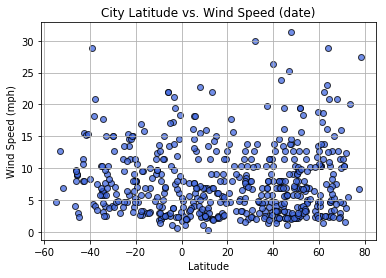

In [13]:
plt.scatter(clean_df['Lat'], clean_df['Wind Speed'], marker="o", facecolors="royalblue", edgecolors="black", alpha=0.75)
plt.grid(True)
#plt.ylim(21,105)
#plt.xlim(-61,85)
plt.title("City Latitude vs. Wind Speed (date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")